In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [3]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'} 
webpage = requests.get('http://books.toscrape.com/',headers=headers).text

In [6]:
soup=BeautifulSoup(webpage,'html.parser')

In [7]:
soup.prettify()

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-us">\n <!--<![endif]-->\n <head>\n  <title>\n   All products | Books to Scrape - Sandbox\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta content="24th Jun 2016 09:29" name="created"/>\n  <meta content="" name="description"/>\n  <meta content="width=device-width" name="viewport"/>\n  <meta content="NOARCHIVE,NOCACHE" name="robots"/>\n  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n  <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>\n  <link href="static/oscar/css/styles.css" rel=

In [9]:
soup.find_all('div',class_ = 'product_price')

[<div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 <div class="product_price">
 <p class="price_color">Â£53.74</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 <div class="product_price">
 <p class="price_color">Â£50.10</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 <div class="product_price">
 <p class="price_color">Â£47.82</p>
 <p class="instock availability">
 <i class="ic

In [28]:
len(soup.find_all('h3'))

20

In [22]:
for i in soup.find_all('h3'):
    print(i.text)

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


In [27]:
len(soup.find_all('p',class_ = 'star-rating'))

20

In [26]:
soup.find_all('p',class_ = 'star-rating')

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating Four">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating Five">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i 

In [41]:
container = soup.find_all('div',class_ = 'col-sm-8 col-md-7')

In [42]:
len(container)

0

In [43]:
books = soup.find_all('article', class_='product_pod')


In [46]:
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    availability = book.find('p', class_='instock availability').text.strip()
    rating = book.find('p', class_='star-rating')['class'][1]  # Get rating class
    print(title, price, availability, rating,sep= '\t | \t')


A Light in the Attic	 | 	Â£51.77	 | 	In stock	 | 	Three
Tipping the Velvet	 | 	Â£53.74	 | 	In stock	 | 	One
Soumission	 | 	Â£50.10	 | 	In stock	 | 	One
Sharp Objects	 | 	Â£47.82	 | 	In stock	 | 	Four
Sapiens: A Brief History of Humankind	 | 	Â£54.23	 | 	In stock	 | 	Five
The Requiem Red	 | 	Â£22.65	 | 	In stock	 | 	One
The Dirty Little Secrets of Getting Your Dream Job	 | 	Â£33.34	 | 	In stock	 | 	Four
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull	 | 	Â£17.93	 | 	In stock	 | 	Three
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics	 | 	Â£22.60	 | 	In stock	 | 	Four
The Black Maria	 | 	Â£52.15	 | 	In stock	 | 	One
Starving Hearts (Triangular Trade Trilogy, #1)	 | 	Â£13.99	 | 	In stock	 | 	Two
Shakespeare's Sonnets	 | 	Â£20.66	 | 	In stock	 | 	Four
Set Me Free	 | 	Â£17.46	 | 	In stock	 | 	Five
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)	 | 	Â£52.29	 | 	In stock	 | 	Five
Rip it Up and Start A

In [ ]:
base_url = "http://books.toscrape.com/catalogue/"
next_page = soup.find('li', class_='next')
while next_page:
    next_url = base_url + next_page.a['href']
    response = requests.get(next_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Repeat the scraping process for the new page
    next_page = soup.find('li', class_='next')


In [48]:
base_url = "http://books.toscrape.com/catalogue/"  # the base url for the websites to be scarped and to go through the pages so that the contant of the pages can be scraped
next_page = soup.find('li', class_='next') # link to the next page of the website to be scraped being traversed 
while next_page: # loop to go through all the pages of the website
    next_url = base_url + next_page.a['href'] # the url of the next page to be scraped
    response = requests.get(next_url) # getting the response of the next page
    soup = BeautifulSoup(response.text, 'html.parser') # parsing the response of the next page
    # Repeat the scraping process for the new page
    next_page = soup.find('li', class_='next')


In [56]:
books

[]

In [49]:
data = []
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    availability = book.find('p', class_='instock availability').text.strip()
    rating = book.find('p', class_='star-rating')['class'][1]
    data.append([title, price, availability, rating])


In [50]:
df = pd.DataFrame(data, columns=['Title', 'Price', 'Availability', 'Rating'])
print(df.head())


                                   Title    Price Availability Rating
0                   A Light in the Attic  Â£51.77     In stock  Three
1                     Tipping the Velvet  Â£53.74     In stock    One
2                             Soumission  Â£50.10     In stock    One
3                          Sharp Objects  Â£47.82     In stock   Four
4  Sapiens: A Brief History of Humankind  Â£54.23     In stock   Five


In [51]:
df


,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
5,The Requiem Red,Â£22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,In stock,Four
9,The Black Maria,Â£52.15,In stock,One


In [52]:
df.shape

(20, 4)

In [55]:
books 

[]

In [54]:
books

[]

In [58]:
title = book.h3.a['title']


In [59]:
print(title)

It's Only the Himalayas


In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL of the website
BASE_URL = "http://books.toscrape.com/catalogue/"

# Function to fetch data from a single page
def scrape_page(soup):
    books = soup.find_all('article', class_='product_pod')
    book_data = []

    for book in books:
        # Extract title
        title = book.h3.a['title']

        # Extract price
        price = book.find('p', class_='price_color').text

        # Extract availability
        availability = book.find('p', class_='instock availability').text.strip()

        # Extract rating (class name contains rating)
        rating = book.find('p', class_='star-rating')['class'][1]

        # Append book data to list
        book_data.append({
            'Title': title,
            'Price': price,
            'Availability': availability,
            'Rating': rating
        })

    return book_data

# Function to handle pagination
def scrape_all_books():
    all_books = []
    next_page_url = "http://books.toscrape.com/catalogue/page-1.html"

    while next_page_url:
        print(f"Scraping: {next_page_url}")

        # Fetch the page
        response = requests.get(next_page_url)
        if response.status_code != 200:
            print(f"Failed to fetch page: {next_page_url}")
            break

        # Parse the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Scrape books from the current page
        page_books = scrape_page(soup)
        all_books.extend(page_books)

        # Find the "Next" button and update the URL for the next page
        next_button = soup.find('li', class_='next')
        if next_button:
            next_page_url = BASE_URL + next_button.a['href']
        else:
            next_page_url = None

        # Add delay to avoid overwhelming the server
        time.sleep(2)

    return all_books

# Main script execution
if __name__ == "__main__":
    books_data = scrape_all_books()

    # Convert the data into a Pandas DataFrame
    df = pd.DataFrame(books_data)

    # Save the data to a CSV file
    df.to_csv('books_scraped.csv', index=False)
    print("Scraping completed! Data saved to 'books_scraped.csv'")


Scraping: http://books.toscrape.com/catalogue/page-1.html
Scraping: http://books.toscrape.com/catalogue/page-2.html
Scraping: http://books.toscrape.com/catalogue/page-3.html
Scraping: http://books.toscrape.com/catalogue/page-4.html
Scraping: http://books.toscrape.com/catalogue/page-5.html
Scraping: http://books.toscrape.com/catalogue/page-6.html
Scraping: http://books.toscrape.com/catalogue/page-7.html
Scraping: http://books.toscrape.com/catalogue/page-8.html
Scraping: http://books.toscrape.com/catalogue/page-9.html
Scraping: http://books.toscrape.com/catalogue/page-10.html
Scraping: http://books.toscrape.com/catalogue/page-11.html
Scraping: http://books.toscrape.com/catalogue/page-12.html
Scraping: http://books.toscrape.com/catalogue/page-13.html
Scraping: http://books.toscrape.com/catalogue/page-14.html
Scraping: http://books.toscrape.com/catalogue/page-15.html
Scraping: http://books.toscrape.com/catalogue/page-16.html
Scraping: http://books.toscrape.com/catalogue/page-17.html
Scrapi

In [4]:
dataframe = pd.read_csv('books_scraped.csv')

In [5]:
dataframe

,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,Four
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,Five
998,1st to Die (Women's Murder Club #1),Â£53.98,In stock,One


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


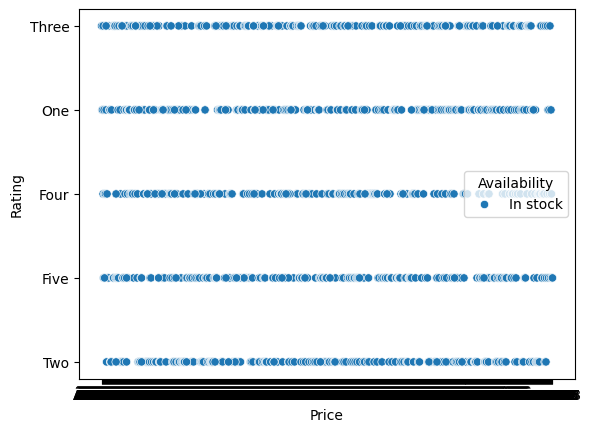

In [6]:
sns.scatterplot(data=dataframe, x='Price', y='Rating', hue='Availability')
plt.show()

In [8]:
dataframe["Rating"].isna().sum()


np.int64(0)